In [2]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import os
# Change directory to the root of the project
os.chdir('..')  # This moves one directory up
from models.classification.LogisticRegression import LogisticRegression

In [3]:
# Load iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Use only two classes: Setosa and Versicolour
iris_df = iris_df[iris_df['target'] < 2]
X = iris_df.drop('target', axis=1).values
y = iris_df['target'].values

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize our custom Logistic Regression model
log_reg = LogisticRegression(learning_rate=0.01, n_iterations=5000, l1_lambda=0.1, l2_lambda=0.1, early_stopping=True)

# Train the model
log_reg.fit(X_train, y_train, X_val, y_val)

In [6]:
# Predict on validation set
y_pred = log_reg.predict(X_val)

# Print classification report
print(classification_report(y_val, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20

Accuracy: 0.6


/Users/ahmedelnagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahmedelnagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ahmedelnagar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

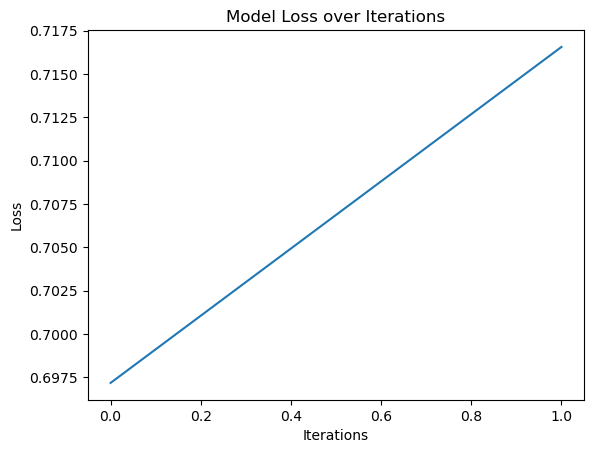

In [7]:
plt.plot(log_reg.losses)
plt.title('Model Loss over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()